## 0 准备工作

### 0.1 import

In [13]:
import sqlite3
import pandas as pd

import matplotlib .pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import re
import jieba

from wordcloud import WordCloud
from imageio import imread #读取图片

### 0.2 读取数据

In [2]:
# 读取数据库
sql = '''
    SELECT a.id 
        , title
        , date
        , vol
        , period
        , intro
        , content
        , anno
    FROM mzdxj_info a
        , mzdxj_content b
    WHERE a.id = b.id
'''

df = pd.read_sql(sql, con=sqlite3.connect('mao.db'))

In [3]:
df.shape

(231, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
id         231 non-null int64
title      231 non-null object
date       231 non-null object
vol        231 non-null int64
period     231 non-null object
intro      231 non-null object
content    231 non-null object
anno       231 non-null object
dtypes: int64(2), object(6)
memory usage: 14.5+ KB


In [5]:
df.sample(5)

,id,title,date,vol,period,intro,content,anno
115,116,关于建立报告制度,1948-01-07,4,第三次国内革命战争时期,这是毛泽东为中共中央起草的对党内的指示。这个指示中所规定的报告制度，是中共中央坚持民主集中制...,为了及时反映情况，使中央有可能在事先或事后帮助各地不犯或少犯错误，争取革命战争更加伟大的胜利...,
200,201,原子弹吓不倒中国人民,1955-01-28,5,社会主义革命和社会主义建设时期,这是毛泽东同志在芬兰首任驻中国大使孙士教递交国书的时候谈话的要点。,中国和芬兰是友好的国家。我们的关系，是建立在和平共处五项原则的基础之上的。中国同芬兰从来没有...,
128,129,新解放区农村工作的策略问题,1948-05-24,4,第三次国内革命战争时期,这是毛泽东给邓小平的电报。,新解放区农村工作的策略问题有全盘考虑之必要。新解放区必须充分利用抗日时期的经验，在解放后的相...,
81,82,必须学会做经济工作,1945-01-10,3,抗日战争时期,这是毛泽东在陕甘宁边区劳动英雄和模范工作者大会上的讲话。,各位劳动英雄，各位模范工作者！你们开了会，总结了经验，大家欢迎你们，尊敬你们。你们有三种长处...,
114,115,目前形势和我们的任务,1947-12-25,4,第三次国内革命战争时期,这是毛泽东在中共中央一九四七年十二月二十五日至二十八日在陕北米脂县杨家沟召集的会议上的报告。...,一中国人民的革命战争，现在已经达到了一个转折点。这即是中国人民解放军已经打退了美国走狗蒋介石...,〔1〕关于人民解放军在各个战场陆续转入进攻，打到国民党统治区的情况，见本卷《评西北大捷兼论解...


### 0.3 相关函数

In [6]:
def contentToStr(cond, col='period'):
    '''
        将 DataFrame 中的指定内容转化为字符串
        @param cond: filter condition, str
        @param col: column name, str, default 'period'
        @return text: conversion results, str
    '''
    text = ' '.join(df[df[col] == cond]['content'].tolist())
    return text

In [31]:
stopwords = [line.strip() for line in open('stopwords.txt', 'r').readlines()] #停用词列表

def cutText(text):
    '''
        中文分词，并去除停用词
        @param text: raw text, str
        @return ouput: split text, str
    '''
    cut_text = jieba.cut(text)
    output = ''
    
    for word in cut_text:
        if word not in stopwords:
            if word != '\t':
                output += word
                output += " "
    
    output = re.sub(r'\(\d*\)|\（\d*\）|\d*', '', output) #去除数字和序号
    
    return output

In [32]:
period_1 = cutText(contentToStr('第一次国内革命战争时期'))

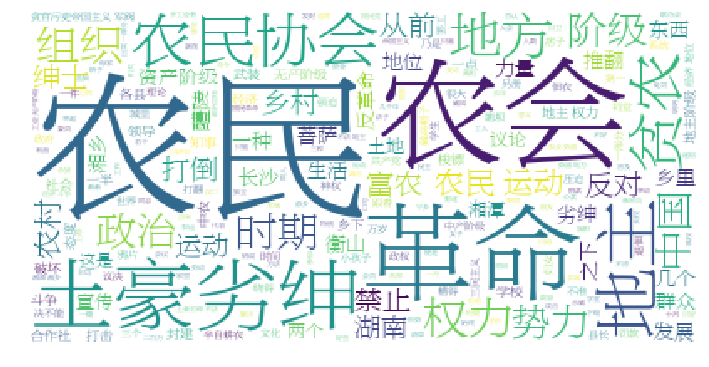

In [28]:
cloud = WordCloud(
        font_path = 'fonts\FZBYSK.ttf', 
        background_color = 'white',
        max_words = 1024,
        max_font_size = 100
    )
    
word_cloud = cloud.generate(period_1)

plt.figure(figsize=(12, 12))
plt.imshow(word_cloud) 
plt.axis('off');

In [33]:
print(period_1)

谁 是 我们 的 敌人 ？ 谁 是 我们 的 朋友 ？ 这个 问题 是 革命 的 首要 问题 。 中国 过去 一切 革命斗争 成效 甚 少 ， 其 基本 原因 就是 因为 不能 团结 真正 的 朋友 ， 以 攻击 真正 的 敌人 。 革命党 是 群众 的 向导 ， 在 革命 中 未有 革命党 领错 了 路 而 革命 不 失败 的 。 我们 的 革命 要 有 不领 错路 和 一定 成功 的 把握 ， 不可不 注意 团结 我们 的 真正 的 朋友 ， 以 攻击 我们 的 真正 的 敌人 。 我们 要 分辨 真正 的 敌友 ， 不可不 将 中国 社会 各 阶级 的 经济 地位 及其 对于 革命 的 态度 ， 作 一个 大概 的 分析 。 中国 社会 各 阶级 的 情况 是 怎样 的 呢 ？ 地主阶级 和 买办阶级 。 在 经济落后 的 半殖民地 的 中国 ， 地主阶级 和 买办阶级 完全 是 国际 资产阶级 的 附庸 ， 其 生存 和 发展 ， 是 附属 于 帝国主义 的 。 这些 阶级 代表 中国 最 落后 的 和 最 反动 的 生产关系 ， 阻碍 中国 生产力 的 发展 。 他们 和 中国 革命 的 目的 完全 不相容 。 特别 是 大 地主阶级 和 大 买办阶级 ， 他们 始终 站 在 帝国主义 一边 ， 是 极端 的 反革命 派 。 其 政治 代表 是 国家主义 派 和 国民党 右派 。 中产阶级 。 这个 阶级 代表 中国 城乡 资本主义 的 生产关系 。 中产阶级 主要 是 指 民族 资产阶级 ， 他们 对于 中国 革命 具有 矛盾 的 态度 ： 他们 在 受 外资 打击 、 军阀 压迫 感觉 痛苦 时 ， 需要 革命 ， 赞成 反 帝国主义 反 军阀 的 革命 运动 ； 但是 当着 革命 在 国内 有 本国 无产阶级 的 勇猛 参加 ， 在 国外 有 国际 无产阶级 的 积极 援助 ， 对于 其欲 达到 大 资产阶级 地位 的 阶级 的 发展 感觉 到 威胁 时 ， 他们 又 怀疑 革命 。 其 政治 主张 为 实现 民族 资产阶级 一 阶级 统治 的 国家 。 有 一个 自称为 戴季陶 “ 真实 信徒 ” 的 ， 在 北京 《 晨报 》 上 发表议论 说 ： “ 举起 你 的 左手 打倒 帝国主义 ， 举起 你 的 右手 打倒 共产党 。 ” 这 两句话 